In [114]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore


import random
import sys
import pandas as pd
import numpy as np
import h5py


In [124]:
# =====Define paramaters======
info = {'filename': 'C:/Users/dimit/Desktop/Msc Business Analytics/Dissertation/My_code/redd.h5',
        'meter_label': 'fridge',  # ["kettle" , "microwave" , "dishwasher" , "fridge" , "washing_machine"]
        'train_building': 1,
        'test_building': 1,
        'sample_period': 3
       }

# Parameters
params = {'batch_size': 512,
          'window_size': 50,
          'model_name': 'DAE',
          'shuffle': True}



#test_window = {1: ('30-4-2011', '5-5-2011')}
train_window = {1: (None, '30-4-2011')}
test_window = {1: (None, None)}

#Load datasets
train = DataSet(filename)
test = DataSet(filename)

def load_dataset(train_window,test_window, filename, meter_label, train_building, test_building, **load_kwargs):
    
        #Load datasets
    train = DataSet(filename)
    test = DataSet(filename)

    test.set_window(*test_window[test_building])
    train.set_window(*train_window[test_building])
    
    x = train.buildings[train_building].elec.mains().all_meters()[0]
    x = x.power_series_all_data(**load_kwargs)
    print(x)
    
    y = train.buildings[train_building].elec.submeters()[meter_label]
    y = y.power_series_all_data(**load_kwargs)
    
    x.fillna(0, inplace=True)
    y.fillna(0, inplace=True)
    ix = x.index.intersection(y.index)
    x = np.array(x[ix])
    y = np.array(y[ix])

    return x ,y 
x , y =load_dataset(train_window,test_window, **info)  
pl = x
x = np.reshape(x, (x.shape[0],1,1))

2011-04-18 09:22:09-04:00    225.283340
2011-04-18 09:22:12-04:00    222.350006
2011-04-18 09:22:15-04:00    222.853333
2011-04-18 09:22:18-04:00    222.706665
2011-04-18 09:22:21-04:00    222.646667
2011-04-18 09:22:24-04:00    222.463333
2011-04-18 09:22:27-04:00    222.236664
2011-04-18 09:22:30-04:00    222.613327
2011-04-18 09:22:33-04:00    222.559998
2011-04-18 09:22:36-04:00    223.436661
2011-04-18 09:22:39-04:00    226.320007
2011-04-18 09:22:42-04:00    223.893341
2011-04-18 09:22:45-04:00    223.526672
2011-04-18 09:22:48-04:00    223.873337
2011-04-18 09:22:51-04:00    225.503326
2011-04-18 09:22:54-04:00    222.669998
2011-04-18 09:22:57-04:00    225.720001
2011-04-18 09:23:00-04:00    226.593338
2011-04-18 09:23:03-04:00    226.106659
2011-04-18 09:23:06-04:00    225.253326
2011-04-18 09:23:09-04:00    225.866669
2011-04-18 09:23:12-04:00    225.366669
2011-04-18 09:23:15-04:00    226.029999
2011-04-18 09:23:18-04:00    226.069992
2011-04-18 09:23:21-04:00    225.449997


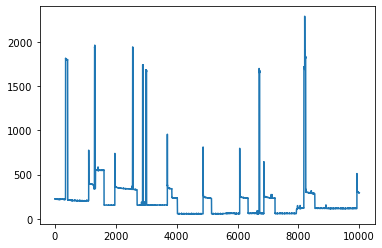

In [133]:
plt.plot(pl[0:10000])
#plt.plot(y)

# GRU

In [80]:
import random
import sys
import pandas as pd
import numpy as np
import h5py

from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GRU, Bidirectional, Dropout, Conv2D,LSTM


model = Sequential()

# 1D Conv
model.add(Conv1D(16, 4, activation="relu", padding="same", strides=1, input_shape=(1,1)))
model.add(Conv1D(8, 4, activation="relu", padding="same", strides=1))

# Bi-directional LSTMs
model.add(Bidirectional(GRU(64, return_sequences=True, stateful=False), merge_mode='concat'))
model.add(Bidirectional(GRU(128, return_sequences=False, stateful=False), merge_mode='concat'))

# Fully Connected Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(x, y, epochs=15, batch_size=128, shuffle=True)

Epoch 1/15
334356/334356 [==============================] - 30s 90us/step - loss: 4359.5670
Epoch 2/15
334356/334356 [==============================] - 31s 94us/step - loss: 3822.3133
Epoch 3/15
334356/334356 [==============================] - 30s 89us/step - loss: 3479.1991
Epoch 4/15
334356/334356 [==============================] - 29s 87us/step - loss: 3258.3688
Epoch 5/15
334356/334356 [==============================] - 30s 89us/step - loss: 2973.7115
Epoch 6/15
334356/334356 [==============================] - 30s 90us/step - loss: 2809.5209
Epoch 7/15
334356/334356 [==============================] - 31s 93us/step - loss: 2770.1877
Epoch 8/15
334356/334356 [==============================] - 30s 89us/step - loss: 2754.6918
Epoch 9/15
334356/334356 [==============================] - 31s 93us/step - loss: 2754.0123
Epoch 10/15
334356/334356 [==============================] - 31s 94us/step - loss: 2736.6973
Epoch 11/15
334356/334356 [==============================] - 33s 98us/step - lo

In [81]:
predict = model.predict(x, batch_size=128)


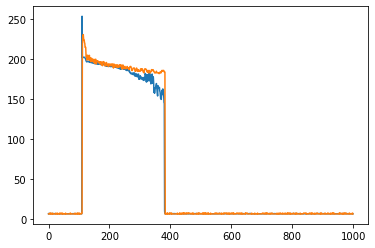

In [93]:
plt.plot(predict[65000:66000])
plt.plot(y[65000:66000])

# DAE

In [96]:
from keras.layers import Reshape, BatchNormalization, Activation, Flatten, Concatenate

model = Sequential()

# 1D Conv
model.add(Conv1D(30, 10, activation='relu', input_shape=(1,1), padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(30, 8, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(40, 6, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(50, 5, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
model.add(Conv1D(50, 5, activation='relu', padding="same", strides=1))
model.add(Dropout(0.2))
# Fully Connected Layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(x, y, epochs=15, batch_size=128, shuffle=True)

Epoch 1/15
334356/334356 [==============================] - 30s 89us/step - loss: 6179.0708
Epoch 2/15
334356/334356 [==============================] - 32s 97us/step - loss: 4477.7987
Epoch 3/15
334356/334356 [==============================] - 32s 96us/step - loss: 4084.7266
Epoch 4/15
334356/334356 [==============================] - 33s 98us/step - loss: 3913.3380
Epoch 5/15
334356/334356 [==============================] - 33s 98us/step - loss: 3759.4368
Epoch 6/15
334356/334356 [==============================] - 33s 99us/step - loss: 3559.8655
Epoch 7/15
334356/334356 [==============================] - 34s 100us/step - loss: 3325.3428
Epoch 8/15
334356/334356 [==============================] - 34s 103us/step - loss: 3279.7547
Epoch 9/15
334356/334356 [==============================] - 34s 102us/step - loss: 3213.8576
Epoch 10/15
334356/334356 [==============================] - 35s 105us/step - loss: 3198.8649
Epoch 11/15
334356/334356 [==============================] - 36s 107us/step

In [97]:
predict = model.predict(x, batch_size=128)


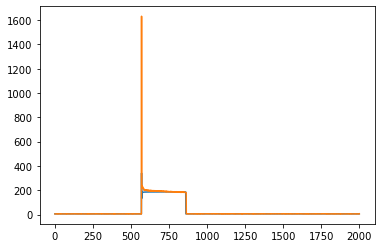

In [101]:
plt.plot(predict[74000:76000])
plt.plot(y[74000:76000])

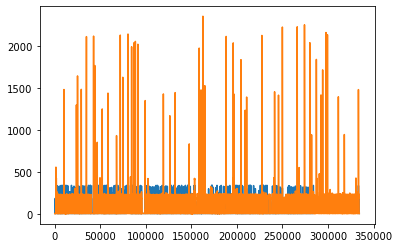

In [104]:
plt.plot(predict)
plt.plot(y)

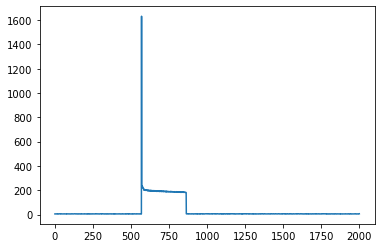

In [103]:
plt.plot(y[74000:76000])

# LSTM


In [108]:
from keras.layers import Dense, Conv1D, GRU, LSTM, Bidirectional, Dropout,Conv2D
from keras.layers import Reshape, BatchNormalization, Activation, Flatten, Concatenate

model = Sequential()

# 1D Conv
model.add(Conv1D(16, 4, activation="linear", input_shape=(1,1), padding="same", strides=1))

#Bi-directional LSTMs
model.add(Bidirectional(LSTM(128, return_sequences=True, stateful=False), merge_mode='concat'))
model.add(Bidirectional(LSTM(256, return_sequences=False, stateful=False), merge_mode='concat'))

# Fully Connected Layers
model.add(Dense(128, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')
#plot_model(model, to_file='model.png', show_shapes=True)


model.fit(x, y, epochs=15, batch_size=128, shuffle=True)

Epoch 1/15
334356/334356 [==============================] - 94s 280us/step - loss: 5167.1996
Epoch 2/15
334356/334356 [==============================] - 91s 271us/step - loss: 4331.2322
Epoch 3/15
334356/334356 [==============================] - 89s 265us/step - loss: 4316.6368
Epoch 4/15
334356/334356 [==============================] - 92s 275us/step - loss: 4197.5180
Epoch 5/15
334356/334356 [==============================] - 91s 273us/step - loss: 4110.3541
Epoch 6/15
334356/334356 [==============================] - 89s 266us/step - loss: 4297.4865
Epoch 7/15
334356/334356 [==============================] - 88s 264us/step - loss: 4207.8171
Epoch 8/15
334356/334356 [==============================] - 92s 275us/step - loss: 4180.7523
Epoch 9/15
334356/334356 [==============================] - 94s 280us/step - loss: 3812.2330
Epoch 10/15
334356/334356 [==============================] - 91s 273us/step - loss: 3929.1781
Epoch 11/15
334356/334356 [==============================] - 88s 263u

In [109]:
predict = model.predict(x, batch_size=128)

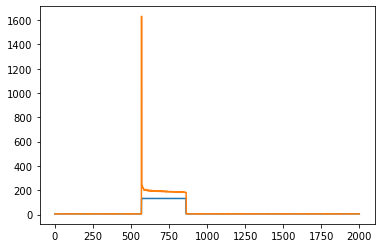

In [110]:
plt.plot(predict[74000:76000])
plt.plot(y[74000:76000])

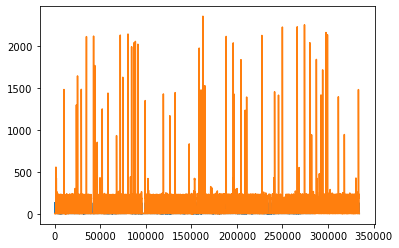

In [111]:
plt.plot(predict)
plt.plot(y)